In [18]:
import numpy as np
import pandas as pd
from scipy.stats import ncx2, chi2, multivariate_normal
from scipy.spatial import distance
from scipy.linalg import fractional_matrix_power
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import plot_decision_regions

In [19]:
#Read data
data = pd.read_csv("./iris.data", header=None)
data = data.drop([0, 1], axis=1) #Only intersted in cols 3 & 4

In [20]:
idx = data.index[data[4] == 'Iris-versicolor'].tolist()
data_Versicolor = data.loc[idx]
# print(data_Versicolor)
data_Versicolor = data_Versicolor.drop([4], axis=1) #drop the label 

In [21]:
idx = data.index[data[4] == 'Iris-setosa'].tolist()
data_Setosa = data.loc[idx]
# print(data_Setosa)
data_Setosa = data_Setosa.drop([4], axis=1) #drop the label 


In [22]:
idx = data.index[data[4] == 'Iris-virginica'].tolist()
data_Virginica = data.loc[idx]
# print(data_virginica)
data_Virginica = data_Virginica.drop([4], axis=1) #drop the label 

In [23]:
set_trn = data_Setosa[0:10].values
ver_trn = data_Versicolor[0:10].values
vir_trn = data_Virginica[0:10].values

In [24]:
set_val = data_Setosa[10:30].values
ver_val = data_Versicolor[10:30].values
vir_val = data_Virginica[10:30].values

In [25]:
set_tst = data_Setosa[30:50].values
ver_tst = data_Versicolor[30:50].values
vir_tst = data_Virginica[30:50].values

In [26]:
trn = np.append(set_trn, ver_trn)
trn = np.append(trn , vir_trn)
trn = trn.reshape((30,2))

In [27]:
val = np.append(set_val, ver_val)
val = np.append(val , vir_val)
val = val.reshape((60,2))


In [28]:
tst = np.append(set_tst, ver_tst)
tst = np.append(tst , vir_tst)
tst = tst.reshape((60,2))

In [29]:
u_set = computeMean(trn[0:10])
# print(u_set)
u_ver = computeMean(trn[10:20])
# print(u_ver)
u_vir = computeMean(trn[20:30])
# print(u_vir)
u = np.concatenate((u_set, u_ver, u_vir), axis=0).reshape((3,2))
# u
# print("Estimated mean vector:")
# u_set

In [30]:
C_set = computeCov(trn[0:10], u_set)
C_ver = computeCov(trn[10:20], u_ver)
C_vir = computeCov(trn[20:30], u_vir)
C = np.concatenate((C_set, C_ver, C_vir), axis=0)
# print(C.reshape((3,2,2)))
C = np.array([C_set, C_ver, C_vir]) #Create 3D array to hold all Cov matri es


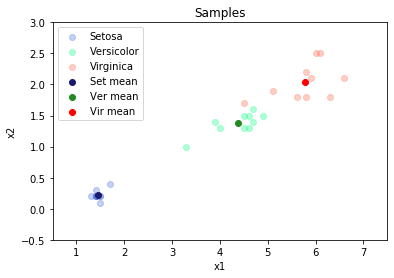

In [31]:
set_plt = plt.scatter(trn[0:10,0], trn[0:10,1], label="Setosa", c='royalblue', alpha=0.3)
ver_plt = plt.scatter(trn[10:20,0], trn[10:20,1], label="Versicolor", c='springgreen', alpha=0.3)
vir_plt = plt.scatter(trn[20:30,0], trn[20:30,1], label="Virginica", c='tomato', alpha=0.3)
set_mean = plt.scatter(u[0,0], u[0,1], label="Set mean", c='midnightblue')
ver_mean = plt.scatter(u[1,0], u[1,1], label="Ver mean", c='forestgreen')
vir_mean = plt.scatter(u[2,0], u[2,1], label="Vir mean", c='r')
plt.legend(handles=[set_plt, ver_plt, vir_plt, set_mean, ver_mean, vir_mean])
plt.title('Samples')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0.5, 7.5)
plt.ylim(-0.5, 3.0)
plt.show()

In [113]:
#For uncorrelated variates
C = uncorrCov(C)

In [102]:
# For isotropic variates
C = isotropicCov(C)

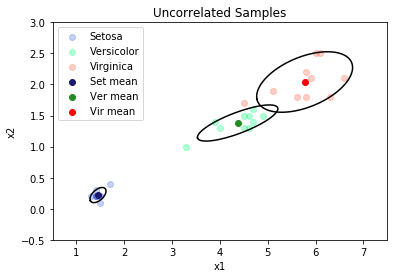

In [32]:
p = 0.5
gamma = 0.99
N = 10
D = 2
L = 3
title = 'Uncorrelated Samples'
plot_tol_reg(p, gamma, u, C, N, D, L, title)

In [33]:
class LQDA:
    # _p = [10, 10, 10]
    # L = 3
       # init method or constructor    
    def __init__(self, C, u):   
        self.C = C
        self.u = u 

    def predict(self, x):
        p = [10, 10, 10]
        L = 3
        N = x.shape[0]
        y_hat = np.empty([N], dtype=int)
        for n in range(N):
            l_hat = np.empty([L], dtype=float) 
            for k in range(0,L):
                pred =-1/2*ln(det(self.C[k]))-1/2*mahalanobis_dist(x[n], self.u[k], self.C[k])+ln(p[k])
                l_hat[k] = pred
            y_hat[n] = np.argmax(l_hat)

        return y_hat
    
    def evaluate(self, x, y):
        miss = 0
        y_hat = self.predict(x)
        N = y_hat.shape[0]
        for n in range(N):
            if (y_hat[n] != y[n]):
                miss += 1
        return miss/N


In [34]:
QDA = LQDA(C, u)
print(QDA.predict(trn))


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 1 2 1 2]


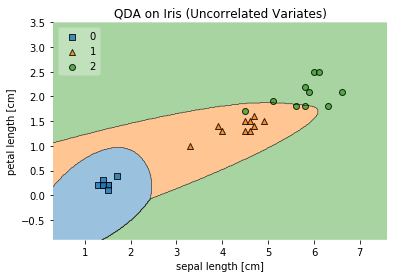

In [38]:
y = np.concatenate((np.full((10), 0), np.full((10), 1), np.full((10), 2))) #Generates true labels (quick hack ;))
plot_dec_reg(trn, y, QDA, 'QDA on Iris (Uncorrelated Variates)')

Overall the classifer does a good job of discriminating between samples from the training data. From looking at the previous tolerange region plot, we notice the overalap between the region of class 1 (Versicolor) and that of class 2 (Virginica). It was therefore expected that the model might miclassify some Virginica samples (those close to the decision boudary) as coming from the Versicolor batch. 

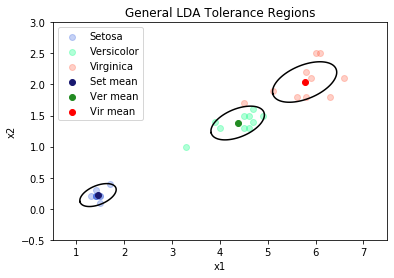

In [35]:
priors= [1/3,1/3,1/3]
C_mle = LDACov(C,priors)
# C_mle = uncorrCov(C_mle)
# C_mle = isotropicCov(C_mle)
title = 'General LDA Tolerance Regions'
plot_tol_reg(p, gamma, u, C_mle, N, D, L, title)
# LDA = LQDA(C_mle, u)


In [137]:
LDA = LQDA(C_mle, u)
print(LDA.predict(trn))

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2]


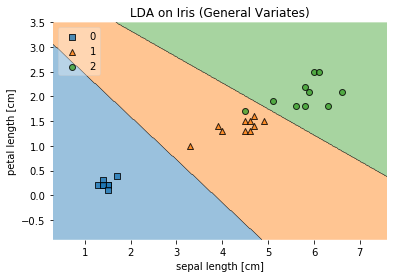

In [117]:
plot_dec_reg(trn, y, LDA, 'LDA on Iris (General Variates)')

The LDA classifier performs better on the training set than did QDA. Both classifiers do a good job at discriminating between samples, but for the most ambiguous cases (The Virginica samples at the decision boundary with the Versicolor samples), the LDA model only misclassifies one Virginica training sample as coming from the Versicolor regardless of the covariance matrix used, while with QDA, in the general case, there were 3 misclassification errors.

# Classifier Olympics

In [36]:
# On training set
y_trn = np.concatenate((np.full((10), 0), np.full((10), 1), np.full((10), 2))) #Generates true labels (quick hack ;))
y_val = np.concatenate((np.full((20), 0), np.full((20), 1), np.full((20), 2)))
y_tst = y_val
print('On training:')
evalClassifiers(trn, y_trn)
print('\nOn validation:')
evalClassifiers(val, y_val)
print('\nOn test:')
evalClassifiers(tst, y_tst)


On training:
General C
QDA: 0.1
LDA: 0.03333333333333333
-------------------
Uncorrelated C
QDA: 0.03333333333333333
LDA: 0.03333333333333333
-------------------
Isotropic C
QDA: 0.03333333333333333
LDA: 0.03333333333333333

On validation:
General C
QDA: 0.1
LDA: 0.03333333333333333
-------------------
Uncorrelated C
QDA: 0.06666666666666667
LDA: 0.03333333333333333
-------------------
Isotropic C
QDA: 0.1
LDA: 0.08333333333333333

On test:
General C
QDA: 0.08333333333333333
LDA: 0.05
-------------------
Uncorrelated C
QDA: 0.05
LDA: 0.05
-------------------
Isotropic C
QDA: 0.06666666666666667
LDA: 0.03333333333333333


The best classifer per its validation set performance is the LDA classifer with general or uncorrelated covariance matrix. When using this model to predict labels on the test set, we get a missclassification rate of 0.05, which is twice as good as QDA on the training set. This result is consistent with the tolerance and decision regions computed. The tolereance regions for the LDA classifier were smaller than those on the the QDA classifier for the same coverage and content values as well as for any covariance matrix case. This means that the LDA tolerance regions were better centered around the mean of the distribution and less likely to include samples from a different distribution. Furthermore, when using general or uncorrelated covariance, the shape of the tolerance region is such that the classifier avoids the one outlier sample (in training set) from class 2 (Virginica), which is labeled as class 1 (Versicolor) by the other classifiers. LDA with general or uncorrelated covariance matrix outperforms the other classifiers because it is more conservetive in its tolerance and decision regions/rules, which is and advantage on the data at hand. 

v = 0.1 | RQDA mr = 0.06666666666666667
------------------------


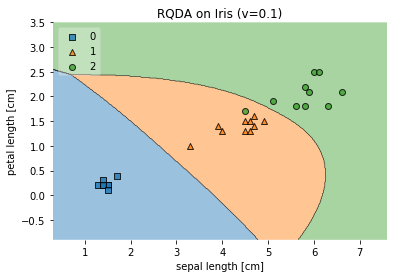

v = 0.2 | RQDA mr = 0.06666666666666667
------------------------


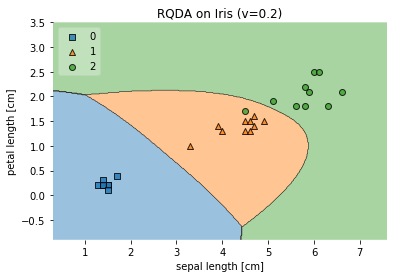

v = 0.30000000000000004 | RQDA mr = 0.06666666666666667
------------------------


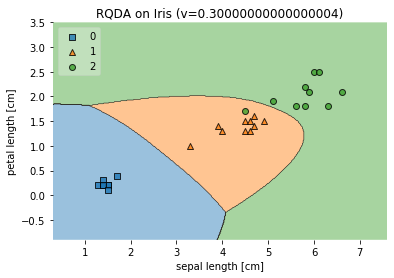

v = 0.4 | RQDA mr = 0.06666666666666667
------------------------


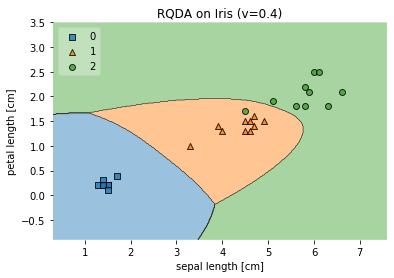

v = 0.5 | RQDA mr = 0.06666666666666667
------------------------


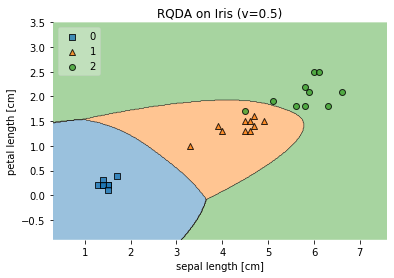

v = 0.6 | RQDA mr = 0.06666666666666667
------------------------


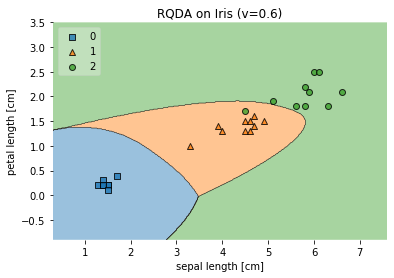

v = 0.7000000000000001 | RQDA mr = 0.08333333333333333
------------------------


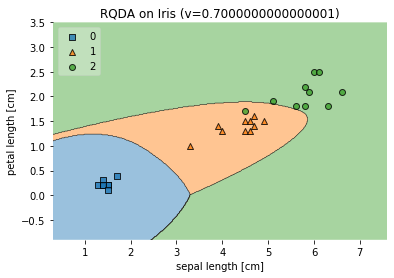

v = 0.8 | RQDA mr = 0.08333333333333333
------------------------


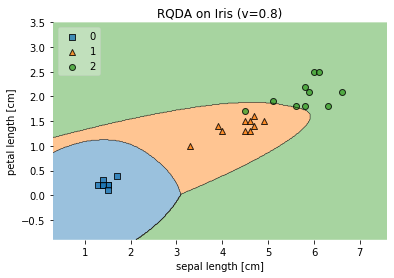

v = 0.9 | RQDA mr = 0.1
------------------------


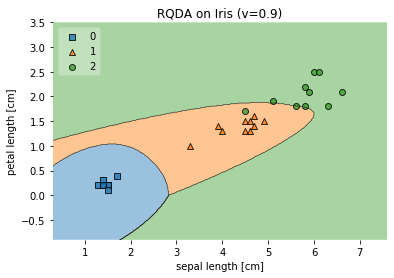

In [39]:
    C, C_mle = resetC()
    # v = 0.1
    for v in np.arange(0.1, 1, 0.1):
        C_r = RQDACov(C, C_mle, v)
        RQDA = LQDA(C_r, u)
        mr = RQDA.evaluate(val, y_val)
        print(f'v = {v} | RQDA mr = {mr}')
        print('------------------------')
        plot_dec_reg(trn, y, RQDA, f'RQDA on Iris (v={v})')


In [40]:
print("On tst data")
v = 0.1
C_r = RQDACov(C, C_mle, v)
RQDA = LQDA(C_r, u)
mr = RQDA.evaluate(tst, y_tst)
print(f'v = {v} | RQDA mr = {mr}')

On tst data
v = 0.1 | RQDA mr = 0.05


part a
$$
\begin{equation*}
C_{RQDA} = \check{C_k} = v\hat{C_k}+(1-v)\hat{C}_{pooled}
\end{equation*}
$$
THe expression for computing the RQDA covariance matrix is a linear interpolation between the QDA and LDA convariance matrices. When $v=0, C_{RQDA} = C_{pooled}$ and the decision region becomes that of an LDA classifer and when $v=1, C_{RQDA} = C_k$ and the decision region is that of a QDA classifier. The plots confirm this, as we slide v from 0.1 to 0.9 the decision region plots which starts looking closer to the one for LDA previously seen morphs into a decision region closer to QDA for higher values of v. Where $v=0.5$ would be the midpoint between an LDA and QDA decision regions

part b
Unsuprisingly, for smaller values of v the misclassification error is smaller. When v is close to 0 the RQDA has more LDA properties, the misclassification error is similar to that obtained with LDA. As seen in previous results, LDA outperforms QDA on the iris data, therefore RQDA that mimics LDA closely has better results than RQDA that mimics QDA. THe best RQDA classifer is when $v=0.1$. When using this RQDA classifier on the test data we get the same misclassification rate as with LDA, 0,05.

In [1]:
def evalClassifiers(data, y):
    # y_hat = QDA.predict(trn)
    C, C_mle = resetC()

    C_vanilla = C
    C_mle_vanilla = C_mle

    print('General C')
    QDA = LQDA(C, u)
    LDA= LQDA(C_mle, u)
    mr = QDA.evaluate(data, y)
    print(f'QDA: {mr}')
    mr = LDA.evaluate(data, y)
    print(f'LDA: {mr}')

    print('-------------------')

    print('Uncorrelated C')
    C_u = uncorrCov(C)
    C_mle_u = uncorrCov(C_mle)
    QDA = LQDA(C_u, u)
    LDA= LQDA(C_mle_u, u)
    mr = QDA.evaluate(data, y)
    print(f'QDA: {mr}')
    mr = LDA.evaluate(data, y)
    print(f'LDA: {mr}')

    print('-------------------')

    print('Isotropic C')
    C_i = isotropicCov(C)
    C_mle_i = isotropicCov(C_mle)
    QDA = LQDA(C_i, u)
    LDA= LQDA(C_mle_i, u)
    mr = QDA.evaluate(data, y)
    print(f'QDA: {mr}')
    mr = LDA.evaluate(data, y)
    print(f'LDA: {mr}')

# y_hat.shape

In [2]:
def resetC():
    C_set = computeCov(trn[0:10], u_set)
    C_ver = computeCov(trn[10:20], u_ver)
    C_vir = computeCov(trn[20:30], u_vir)
    C = np.concatenate((C_set, C_ver, C_vir), axis=0)
    C = np.array([C_set, C_ver, C_vir]) #Create 3D array to hold all Cov matri es
    # print(C)
    priors= [1/3,1/3,1/3]
    C_mle = LDACov(C,priors)
    # print(C_mle)
    return C, C_mle


In [3]:
def det(X):
    return np.linalg.det(X)

In [4]:
def ln(x):
    return np.log(x)

In [5]:
def get_tol_reg_rad(data, u, C, tol_rad):
    N = data.shape[0]
    R = np.empty((0,2), float) 
    max_R = -1
    for n in range(1, N):
        x = data[n]
        mhnbs_dist = mahalanobis_dist(x, u, C)
        if (mhnbs_dist <= tol_rad):
            x = x.reshape((1,2))
            R = np.append(R, x, axis=0)
            if (mhnbs_dist > max_R): #to find the farthest point from mean for a given p% tolerace
                farthest_point = x
                max_R = mhnbs_dist

    return max_R

In [6]:
def computeMean(X):
    N = X.shape[0]
    mean = np.sum(X, axis=0)/N
    return mean.reshape((2,1))

In [7]:
def computeCov(X, u):
    # u = u.reshape((2,1))
    uuT = u*(u.T)
    N = X.shape[0]
    cn = np.zeros((2, 2))
    for n in range(N):
        x = X[n]
        x = x.reshape((2, 1))
        cn += x*(x.T) - uuT
    return cn/N

In [8]:
def uncorrCov(C):
    N = C.shape[0]
    for i in range(N):
        C[i] = np.diag(np.diag(C[i]))
    return C

In [9]:
def isotropicCov(C):
    N = C.shape[0]
    D = C.shape[1]
    for i in range(N):
        C[i] = 1/D*np.trace(C[i])*np.identity(2)
    return C

In [10]:
def RQDACov(C, C_pool, v):
    K = C.shape[0]
    C_r = np.empty((2,2))
    C_r = np.array([C_r, C_r, C_r])
    for k in range(K):
        C_r[k] = v*C[k]+(1-v)*C_pool[k]
    return C_r

In [11]:
def LDACov(C,p):
    K = C.shape[0]
    for k in range(K):
        C_mle = C[k]*p[k]
    C_mle = np.array([C_mle, C_mle, C_mle]) #Create 3D array to hold all Cov matri es
    return C_mle

In [12]:
def get_ellipse(r, C, u):

    A = np.linalg.inv(C)
    lmda, V = np.linalg.eig(A)
    L = np.diag(lmda)
    B = V.dot(fractional_matrix_power(L, -0.5))

    x_t = np.empty((0,2), float)
    # print(x_t.shape)
    for t in np.linspace(0, 2*np.pi, 100):
        unit = np.array([np.cos(t), np.sin(t)])
        u = u.reshape((2,1))
        unit = unit.reshape((2,1))
        temp_x_t = r*B.dot(unit) + u
        temp_x_t = temp_x_t.reshape((1,2))
        x_t = np.append(x_t, (temp_x_t) , axis=0)
    
    return x_t
        # x_t = r*B.dot(unit) + u

In [13]:
def tolerance_radius(p, gamma, N, D):
    df_cnx2 = D
    df_x2 = (N-1)*D
    nc = D/N #Non centrality param
    return np.sqrt(N*D*ncx2.ppf(p, df_cnx2, nc)/(chi2.ppf((1-gamma), df_x2)))

In [14]:
def tolerance_radius(p, gamma, N, D):
    df_cnx2 = D
    df_x2 = (N-1)*D
    nc = D/N #Non centrality param
    return np.sqrt(N*D*ncx2.ppf(p, df_cnx2, nc)/(chi2.ppf((1-gamma), df_x2)))

In [15]:
def mahalanobis_dist(x, u, C):
    C_inv = np.linalg.inv(C)
    y = (x-u).reshape((1,2))
    i = y.dot(C_inv)
    return float(np.sqrt(i.dot(y.T)))


In [16]:
def plot_tol_reg(p, gamma,u, C, N, D, L, title):
    tol_regs = np.empty((0,2), float) 
    tol_rad = tolerance_radius(p, gamma, N, D)

    for l in range(1,L+1):
        max = l*10
        min = max-10
        R = get_tol_reg_rad(trn[min:max], u[l-1], C[l-1], tol_rad)
        tol_regs = np.append(tol_regs, get_ellipse(R, C[l-1], u[l-1]))

    tol_regs = tol_regs.reshape((300,2))

    set_plt = plt.scatter(trn[0:10,0], trn[0:10,1], label="Setosa", c='royalblue', alpha=0.3)
    ver_plt = plt.scatter(trn[10:20,0], trn[10:20,1], label="Versicolor", c='springgreen', alpha=0.3)
    vir_plt = plt.scatter(trn[20:30,0], trn[20:30,1], label="Virginica", c='tomato', alpha=0.3)
    set_mean = plt.scatter(u[0,0], u[0,1], label="Set mean", c='midnightblue')
    ver_mean = plt.scatter(u[1,0], u[1,1], label="Ver mean", c='forestgreen')
    vir_mean = plt.scatter(u[2,0], u[2,1], label="Vir mean", c='r')
    plt.legend(handles=[set_plt, ver_plt, vir_plt, set_mean, ver_mean, vir_mean])
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(0.5, 7.5)
    # plt.ylim(0.5, 7.5)
    plt.ylim(-0.5, 3.0)
    plt.plot(tol_regs[0:100,0], tol_regs[0:100,1], c='black')
    plt.plot(tol_regs[100:200,0], tol_regs[100:200,1], c='black')
    plt.plot(tol_regs[200:300,0], tol_regs[200:300,1], c='black')
    plt.show()

In [17]:
def plot_dec_reg(X, y, model, title):
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title(title)
    plt.show()